In [1]:
import ccxt
import pandas as pd
import sys
from pprint import pprint
# import logging
# logging.basicConfig(level=logging.DEBUG)

print('python', sys.version)
print('CCXT Version:', ccxt.__version__)

exchange = ccxt.kucoinfutures({
    'adjustForTimeDifference': True,
    "apiKey": '64a80c89ea93ce000118422b',
    "secret": '8df0d5e5-0627-4a7d-aa12-89b87a435f1f',
    'password': 'ktVVLYFPPzvRnY6V',
})
# exchange.verbose = True

securities = pd.DataFrame(exchange.load_markets()).transpose()
pprint(securities)

python 3.11.3 (main, Apr 19 2023, 23:54:32) [GCC 11.2.0]
CCXT Version: 3.1.6
                          id              symbol base quote baseId quoteId   
BTC/USDT:USDT       XBTUSDTM       BTC/USDT:USDT  BTC  USDT    XBT    USDT  \
BTC/USD:BTC          XBTUSDM         BTC/USD:BTC  BTC   USD    XBT     USD   
ETH/USDT:USDT       ETHUSDTM       ETH/USDT:USDT  ETH  USDT    ETH    USDT   
BCH/USDT:USDT       BCHUSDTM       BCH/USDT:USDT  BCH  USDT    BCH    USDT   
BSV/USDT:USDT       BSVUSDTM       BSV/USDT:USDT  BSV  USDT    BSV    USDT   
...                      ...                 ...  ...   ...    ...     ...   
MAV/USDT:USDT       MAVUSDTM       MAV/USDT:USDT  MAV  USDT    MAV    USDT   
MDT/USDT:USDT       MDTUSDTM       MDT/USDT:USDT  MDT  USDT    MDT    USDT   
XEC/USDT:USDT       XECUSDTM       XEC/USDT:USDT  XEC  USDT    XEC    USDT   
XVG/USDT:USDT       XVGUSDTM       XVG/USDT:USDT  XVG  USDT    XVG    USDT   
BTC/USD:BTC-230929   XBTMU23  BTC/USD:BTC-230929  BTC   USD    XB

In [11]:
securities.quote.unique()

array(['USDT', 'USD', 'USDC'], dtype=object)

#### Constants

In [660]:
quote = 'USDT'
time_frame = '1d'
data_folder = '../freq-user-data/data/kucoin'

#### Get pairs from exchange API

In [661]:
df = securities[['base', 'quote']]
df = df[df.quote.isin(['USDT'])]
" ".join(df.base + '/' + df.quote)
pairs = df.head(50).values

In [662]:

data_files = [
    (f'{base}_{quote}-{time_frame}-futures.json', base, quote)
    for [base,quote] in pairs
]


#### Get pairs/coins from filenames in the data folder

In [902]:
import glob

quote = 'USDT'
time_frame = '1d'

pairs = [
    f.replace(data_folder + '/','').split('-')[0].split('_')
    for f in 
    glob.glob(f"{glob.escape(data_folder)}/*_{quote}-{time_frame}.json")
]
coins = [p[0] for p in pairs if p[0] not in ['USDC', 'BUSD', 'USDT']]
###

# coins

data_files = [
    (f'{base}_{quote}-{time_frame}.json', base, quote)
    for base in coins
]
# data_files
df = pd.concat([
    pd.read_json(f'{data_folder}/{data_file}').set_axis(['ts', 'o','h','l','c','v'], axis=1
    ).set_index('ts'
    )['c']
    for (data_file, base, quote) in data_files
], axis=1).set_axis(coins, axis=1
).assign(dt=lambda x: pd.to_datetime(x.index.values, unit='ms', utc=False)
).set_index('dt'
)

df

,1INCH,AAVE,ACH,ADA,AGIX,AGLD,FET,FIL,FLOKI,FLOW,...,RNDR,ROSE,GRT,HBAR,HFT,HIGH,XEC,XEM,XLM,XMR
dt,,,,,,,,,,,,,,,,,,,,,
2020-12-25,2.293,79.420,NaN,0.157392,NaN,NaN,NaN,24.4574,NaN,NaN,...,NaN,0.04570,0.35852,NaN,NaN,NaN,NaN,0.245102,0.152419,NaN
2020-12-26,1.596,74.819,NaN,0.157960,NaN,NaN,NaN,23.5101,NaN,NaN,...,NaN,0.04434,0.48377,NaN,NaN,NaN,NaN,0.236200,0.146921,NaN
2020-12-27,1.060,76.779,NaN,0.154347,NaN,NaN,NaN,22.2631,NaN,NaN,...,NaN,0.04322,0.39624,NaN,NaN,NaN,NaN,0.234758,0.145275,NaN
2020-12-28,1.110,81.812,NaN,0.176322,NaN,NaN,NaN,22.0420,NaN,NaN,...,NaN,0.04578,0.38050,NaN,NaN,NaN,NaN,0.230324,0.144731,NaN
2020-12-29,0.884,78.067,NaN,0.190659,NaN,NaN,NaN,20.3867,NaN,NaN,...,NaN,0.04074,0.37309,NaN,NaN,NaN,NaN,0.222784,0.138540,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-10-17,NaN,NaN,NaN,0.105908,NaN,NaN,NaN,42.5300,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.112500,0.082667,NaN
2020-10-18,NaN,NaN,NaN,0.107374,NaN,NaN,NaN,32.6506,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.112562,0.079439,NaN
2020-10-19,NaN,NaN,NaN,0.108657,NaN,NaN,NaN,33.7718,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.111609,0.085139,NaN


array([[ 7200.2 ,  6964.8 ,  7346.2 , ..., 30765.9 , 30504.3 , 29895.  ],
       [  130.68,   127.12,   134.32, ...,  1936.03,  1910.16,  1846.18]])

#### Check cointegration between pricdes

In [842]:
import statsmodels
from statsmodels.tsa.stattools import coint

X,Y = df.iloc[:,[0,1]].T.values
# compute the p-value of the cointegration test
# will inform us as to whether the ratio between the 2 timeseries is stationary
# around its mean
score, pvalue, _ = coint(X,Y)
print(pvalue)
# print(np.corr(X,Y))

0.28191219139587753


In [896]:
### Remove coins with less than 1000 available values
non_null_values = df.count()
coins = non_null_values[non_null_values > 1000].index.values.tolist()
df = df[coins]
df
# null_values[null_values >= 0] 
# sort_values(ascending=False)

""
dt
2023-06-28
2023-06-29
2023-06-30
2023-07-01
2023-07-02
2023-07-03
2023-07-04
2023-07-05
2023-07-06


#### Calculate returns

In [894]:

df_rets = df.apply(lambda x: x.pct_change()).dropna()
df_lrets = df.apply(lambda x: x.divide(x.shift()).apply(np.log)).dropna()
df_cumlrets = df_lrets.apply(lambda x: x.cumsum())
df_cumlrets
# 

,1INCH,AAVE,ACH,ADA,AGIX,AGLD,FET,FIL,FLOKI,FLOW,...,RNDR,ROSE,GRT,HBAR,HFT,HIGH,XEC,XEM,XLM,XMR
dt,,,,,,,,,,,,,,,,,,,,,
2023-06-29,0.032376,0.059681,-0.015678,0.030392,0.008438,0.042241,0.018978,0.015868,0.014215,0.011717,...,0.029948,0.004535,0.002252,0.012720,-0.014087,0.005836,0.052285,0.012271,0.017321,-0.005234
2023-06-30,0.059992,0.171179,-0.018763,0.072587,0.075266,0.063992,0.060735,0.046766,0.171628,0.062622,...,0.060401,0.068387,0.031262,0.061254,0.036887,0.028032,0.601079,0.064384,0.097753,0.022508
2023-07-01,0.108542,0.139201,-0.010177,0.091459,0.140390,0.061941,0.100395,0.085445,0.146099,0.322570,...,0.071385,0.107436,0.033349,0.063423,0.048189,0.062394,0.507844,0.106698,0.067796,0.014523
2023-07-02,0.083731,0.174878,-0.022508,0.088994,0.113732,0.068762,0.097432,0.086589,0.109293,0.342710,...,0.053949,0.096687,0.145502,0.049739,0.019824,0.040956,0.510826,0.087883,0.066473,0.027540
2023-07-03,0.135475,0.207096,0.036408,0.104911,0.179773,0.108414,0.136098,0.227437,0.150453,0.307808,...,0.116943,0.126308,0.281710,0.053924,0.070162,0.098649,0.432901,0.132574,0.053811,0.025885
2023-07-04,0.090420,0.260411,-0.009782,0.091234,0.129103,0.134532,0.107135,0.187102,0.107683,0.232878,...,0.077002,0.111123,0.221044,0.018712,0.061431,0.099406,0.370427,0.099027,0.029204,0.007920
2023-07-05,0.051794,0.228686,-0.052471,0.062243,0.082511,0.248986,0.056327,0.198563,0.059939,0.189303,...,0.023551,0.067982,0.156123,-0.009277,0.035564,0.042560,0.352199,0.067153,0.001314,0.012607
2023-07-06,0.009595,0.168149,-0.052831,0.042417,0.034868,0.152511,-0.005153,0.134393,0.021635,0.197398,...,-0.002297,0.030063,0.124956,-0.033287,-0.020785,-0.030563,0.459746,0.017879,-0.046320,0.005267


<Axes: xlabel='dt'>

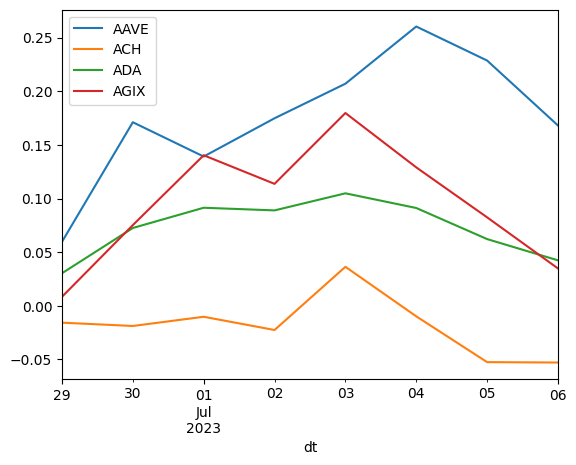

In [895]:
df_cumlrets.iloc[:, 1:5].plot()

In [862]:
from math import *
df.AAVE, df.AAVE.pct_change() , df.AAVE.divide(df.AAVE.shift()).apply(np.log), 

(ts
 1687910400000    59.335
 1687996800000    62.984
 1688083200000    70.413
 1688169600000    68.197
 1688256000000    70.674
 1688342400000    72.988
 1688428800000    76.985
 1688515200000    74.581
 1688601600000    70.200
 Name: AAVE, dtype: float64,
 ts
 1687910400000         NaN
 1687996800000    0.061498
 1688083200000    0.117951
 1688169600000   -0.031471
 1688256000000    0.036321
 1688342400000    0.032742
 1688428800000    0.054762
 1688515200000   -0.031227
 1688601600000   -0.058742
 Name: AAVE, dtype: float64,
 ts
 1687910400000         NaN
 1687996800000    0.059681
 1688083200000    0.111497
 1688169600000   -0.031977
 1688256000000    0.035677
 1688342400000    0.032217
 1688428800000    0.053316
 1688515200000   -0.031725
 1688601600000   -0.060537
 Name: AAVE, dtype: float64,
 0.059681374765063785)

#### Perform Hierarchical Clustering

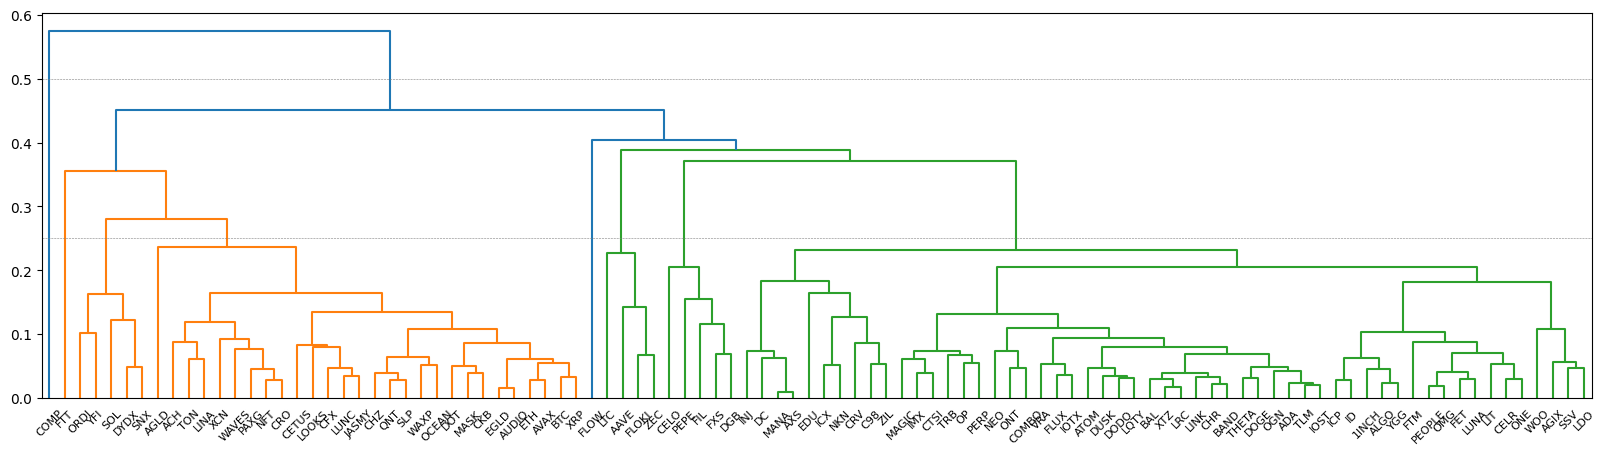

In [847]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage

from scipy.spatial.distance import squareform, pdist
import scipy.cluster.hierarchy as hcl

# <!-- data = list(zip(x, y)) -->
data = df_rets[df_rets.columns[:100]]

linkage_data = linkage(data.T.values, method='ward', metric='euclidean')

fig, ax = plt.subplots(1, 1, figsize=(20, 5))

dendrogram(linkage_data, ax=ax, labels=data.columns, leaf_rotation=45., leaf_font_size=8.)
for y in np.arange(0,2,0.25): ax.axhline(y, linestyle='--', lw=0.4, c='gray')
# ax.set_yscale('log')
plt.show()

### Find cointegrated pairs

In [669]:
import seaborn as sns
import statsmodels
from statsmodels.tsa.stattools import coint

In [670]:
def find_cointegrated_pairs(data):
    n = data.shape[1]
    score_matrix = np.zeros((n, n))
    pvalue_matrix = np.ones((n, n))
    keys = data.keys()
    pairs = []
    for i in range(n):
        for j in range(i+1, n):
            S1 = data[keys[i]]
            S2 = data[keys[j]]
            result = coint(S1, S2)
            score = result[0]
            pvalue = result[1]
            score_matrix[i, j] = score
            pvalue_matrix[i, j] = pvalue
            if pvalue < 0.05:
                pairs.append((keys[i], keys[j]))
    return score_matrix, pvalue_matrix, pairs

In [671]:

data = df_rets[df_rets.columns[:50]].copy()

data['dt'] = pd.to_datetime(data.index.values, unit='ms', utc=False)
data.set_index(pd.DatetimeIndex(data["dt"]), inplace=True, drop=True)
data.sort_index(inplace=True)
data

,ADA,BTC,CHR,ALGO,ATOM,ETH,NEO,ONT,XRP,VRA,...,TRX,UMA,UNI,VET,MKR,STX,SXP,XEM,XLM,dt
dt,,,,,,,,,,,,,,,,,,,,,
2020-01-01,-0.782001,-0.696573,-0.329617,-0.300446,-0.113905,-0.786579,-0.420455,0.148334,-0.429057,0.142627,...,-0.522731,0.000000,0.000000,-0.637068,0.000000,0.000000,0.815764,-0.869552,-0.714259,2020-01-01
2020-01-02,-0.020333,-0.032694,-0.003659,-0.028662,-0.068849,-0.027242,-0.042298,-0.046016,-0.028965,-0.020113,...,-0.027767,0.000000,0.000000,-0.055859,0.000000,0.000000,0.030887,-0.058235,-0.036542,2020-01-02
2020-01-03,0.043225,0.054761,-0.008279,0.064637,0.035784,0.056639,0.045418,0.052667,0.031910,0.062789,...,0.045058,0.000000,0.000000,0.056744,0.000000,0.000000,-0.041299,-0.011393,0.045033,2020-01-03
2020-01-04,0.009390,0.001239,0.008887,0.030356,0.003398,-0.000670,0.025145,0.001794,-0.001189,0.036943,...,0.001266,0.000000,0.000000,0.043851,0.000000,0.000000,0.080243,0.046002,0.000768,2020-01-04
2020-01-05,0.001657,0.000625,-0.008275,-0.020495,-0.011571,0.008567,-0.007868,0.032001,0.007404,0.032969,...,0.006917,0.000000,0.000000,-0.028476,0.000000,0.000000,0.013079,-0.014003,-0.001994,2020-01-05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-07-02,-0.002462,0.000968,-0.007609,-0.032838,0.004048,0.006797,-0.027495,-0.035401,0.023903,-0.008208,...,-0.016088,-0.007339,-0.003954,-0.004623,0.021916,-0.002000,0.048787,-0.018639,-0.001322,2023-07-02
2023-07-03,0.016044,0.017684,0.029035,0.038804,0.035240,0.009306,-0.019610,-0.009005,0.009288,0.020206,...,0.017167,0.022797,-0.007185,0.001573,0.133681,0.062706,0.003679,0.045705,-0.012583,2023-07-03
2023-07-04,-0.013584,-0.012537,-0.015810,-0.034241,-0.025427,-0.009962,-0.014716,-0.018910,-0.003947,-0.060695,...,-0.003802,0.004819,-0.004469,-0.028965,0.006189,-0.066280,-0.031946,-0.032991,-0.024306,2023-07-04


In [672]:
coins = data.columns.values.tolist()
scores, pvalues, pairs = find_cointegrated_pairs(data)

m = [0,0.2,0.4,0.6,0.8,1]


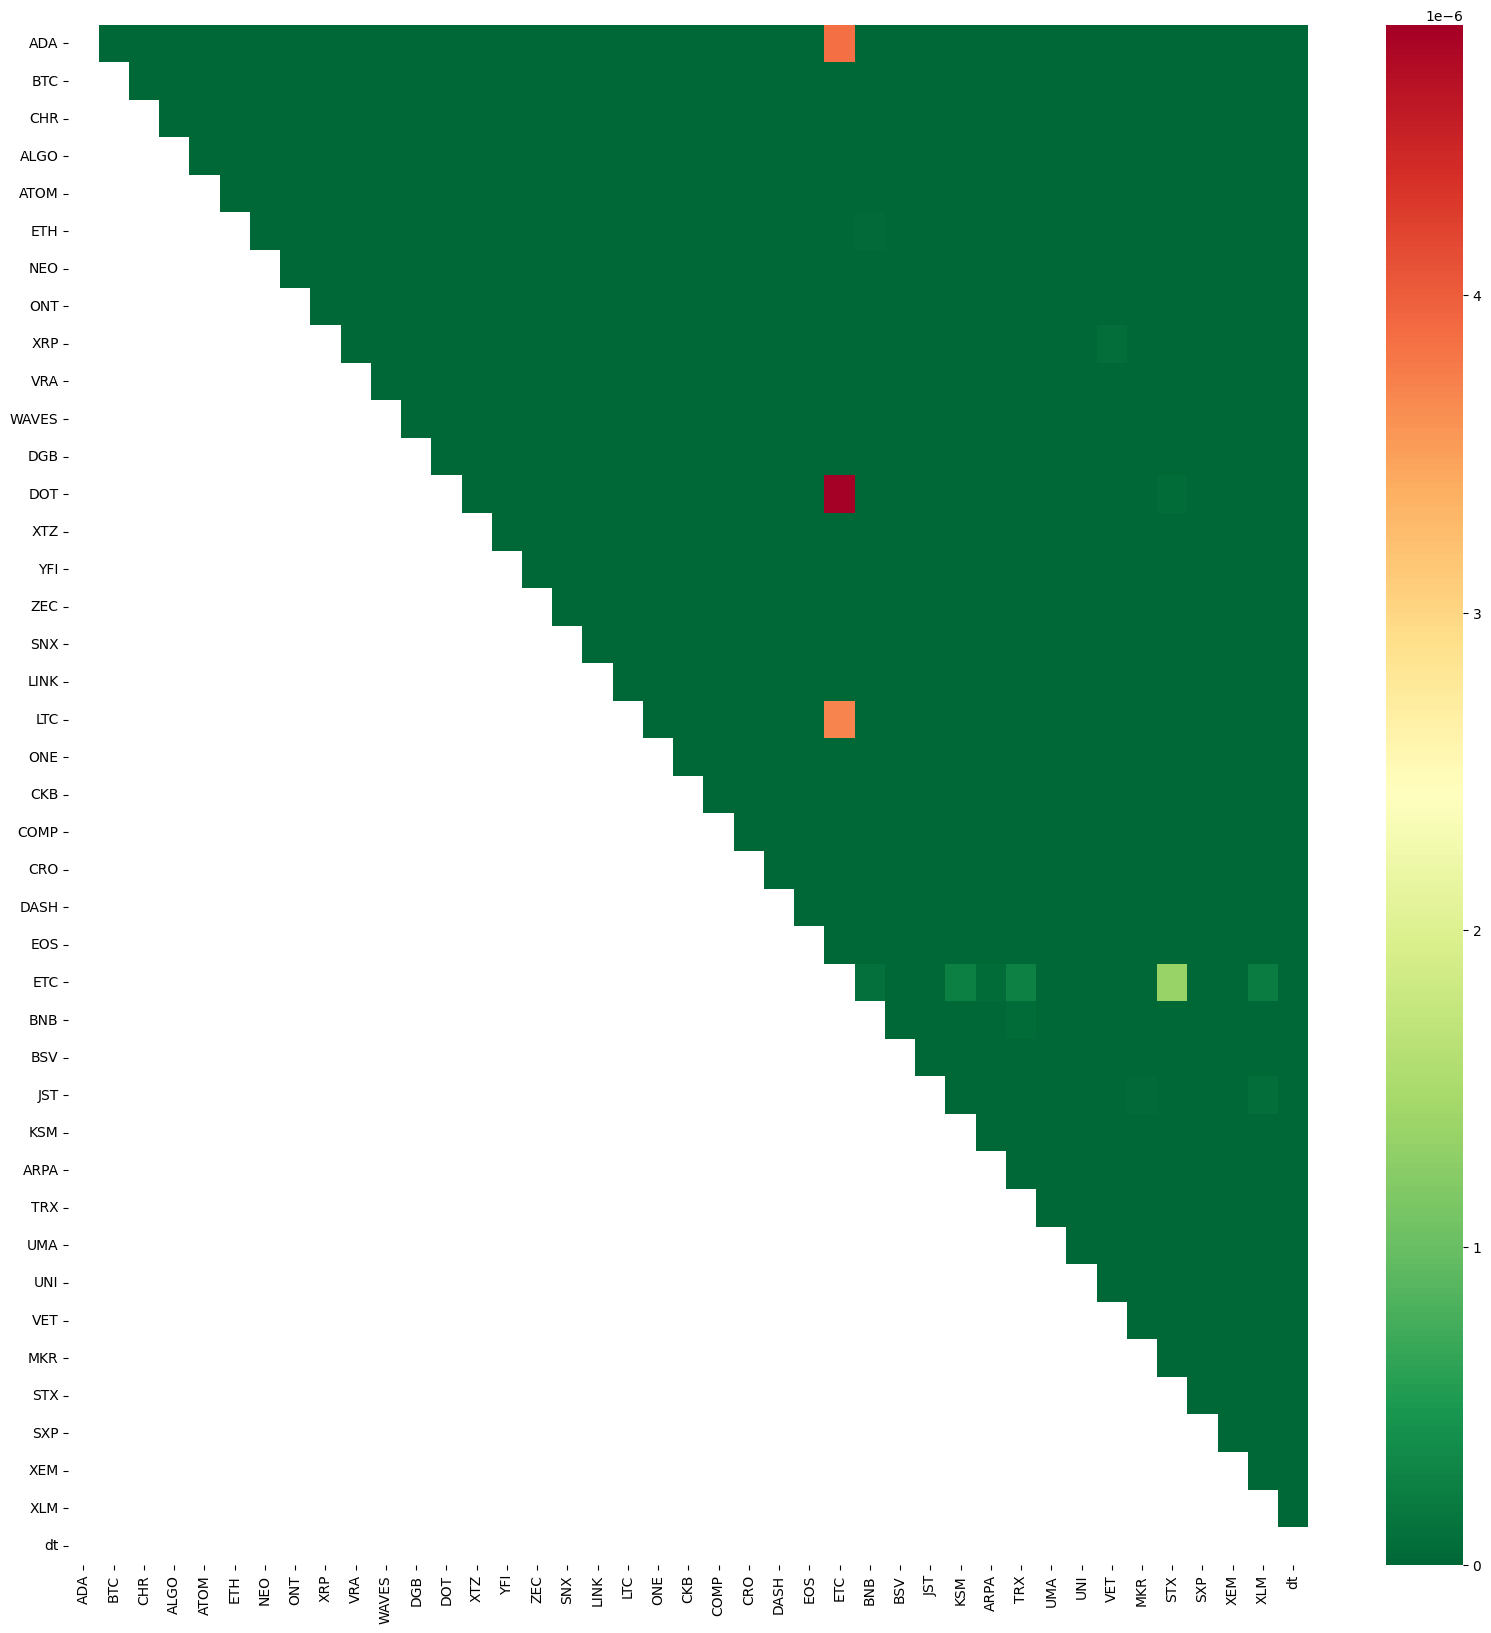

[('ADA', 'BTC'), ('ADA', 'CHR'), ('ADA', 'ALGO'), ('ADA', 'ATOM'), ('ADA', 'ETH'), ('ADA', 'NEO'), ('ADA', 'ONT'), ('ADA', 'XRP'), ('ADA', 'VRA'), ('ADA', 'WAVES'), ('ADA', 'DGB'), ('ADA', 'DOT'), ('ADA', 'XTZ'), ('ADA', 'YFI'), ('ADA', 'ZEC'), ('ADA', 'SNX'), ('ADA', 'LINK'), ('ADA', 'LTC'), ('ADA', 'ONE'), ('ADA', 'CKB'), ('ADA', 'COMP'), ('ADA', 'CRO'), ('ADA', 'DASH'), ('ADA', 'EOS'), ('ADA', 'ETC'), ('ADA', 'BNB'), ('ADA', 'BSV'), ('ADA', 'JST'), ('ADA', 'KSM'), ('ADA', 'ARPA'), ('ADA', 'TRX'), ('ADA', 'UMA'), ('ADA', 'UNI'), ('ADA', 'VET'), ('ADA', 'MKR'), ('ADA', 'STX'), ('ADA', 'SXP'), ('ADA', 'XEM'), ('ADA', 'XLM'), ('ADA', 'dt'), ('BTC', 'CHR'), ('BTC', 'ALGO'), ('BTC', 'ATOM'), ('BTC', 'ETH'), ('BTC', 'NEO'), ('BTC', 'ONT'), ('BTC', 'XRP'), ('BTC', 'VRA'), ('BTC', 'WAVES'), ('BTC', 'DGB'), ('BTC', 'DOT'), ('BTC', 'XTZ'), ('BTC', 'YFI'), ('BTC', 'ZEC'), ('BTC', 'SNX'), ('BTC', 'LINK'), ('BTC', 'LTC'), ('BTC', 'ONE'), ('BTC', 'CKB'), ('BTC', 'COMP'), ('BTC', 'CRO'), ('BTC', 'D

In [673]:

fig, ax = plt.subplots(figsize=(20,20))
sns.heatmap(pvalues, ax=ax, xticklabels=coins, yticklabels=coins, cmap='RdYlGn_r', mask = (pvalues >= 0.98))
plt.show()
print(pairs)

#### Load data again

In [808]:
coins = ['DOT', 'ETC']
quote = 'USDT'

data_folder = '../freq-user-data/data/kucoin'
time_frame = '1d'

data_files = [
    (f'{base}_{quote}-{time_frame}.json', base, quote)
    for base in coins
]

df = pd.concat([
    pd.read_json(f'{data_folder}/{data_file}').set_axis(['ts', 'o','h','l','c','v'], axis=1
    ).assign(dt=lambda df: pd.to_datetime(df['ts'], unit='ms', utc=False)
    ).set_index('dt')['c']
    # ).set_index('ts')['c']
    for (data_file, base, quote) in data_files
], axis=1).set_axis(['S1','S2'], axis=1
)

for c in ['S1', 'S2'] : df[f'lret_{c}'] = df[c].divide(df[c].shift()).apply(np.log)
# df = df.join(df[['S1','S2']].apply(lambda x: x.divide(x.shift().apply(np.log, axis=1))).set_axis(['lret_S1', 'lret_S2'], axis=1)
df = df.assign(ratio=lambda x: x['S1']/x['S2']
)
# df = df.join(df[['lret_S1','lret_S2']].set_axis(['clret_S1','clret_S1'],axis=1))
# df_rets = df.apply(lambda x: x.pct_change()).dropna(

# ).assign(tj=lambda x: x.index).assign(tj = lambda x: x.tj.diff()
# ).assign(ratio=lambda x: x['S1']/x['S2'])
df = df.dropna()
df

,S1,S2,lret_S1,lret_S2,ratio
dt,,,,,
2020-08-22,4.5465,6.7464,0.389558,0.018778,0.673915
2020-08-23,3.9640,6.7543,-0.137104,0.001170,0.586885
2020-08-24,4.5632,6.8442,0.140771,0.013222,0.666725
2020-08-25,5.5486,6.4430,0.195522,-0.060407,0.861183
2020-08-26,6.0767,6.4161,0.090916,-0.004184,0.947102
...,...,...,...,...,...
2023-07-02,5.5027,20.3683,0.027825,-0.025032,0.270160
2023-07-03,5.4292,20.0733,-0.013447,-0.014589,0.270469
2023-07-04,5.3493,19.4936,-0.014826,-0.029304,0.274413


In [675]:
df = df.join(df[['lret1','lret2']].cumsum().set_axis(['clret1','clret2'],axis=1))

ValueError: columns overlap but no suffix specified: Index(['clret1', 'clret2'], dtype='object')

In [801]:

def zscore(series):
    return (series - series.mean()) / np.std(series)

def add_indicators(wdf,zlag,rma1,rma2, thre):
    # wdf['rma1'] = wdf.ratio.rolling(rma1).mean()
    # wdf['rma2'] = wdf.ratio.rolling(rma2).mean()
    wdf['rma1'] = wdf.ratio.ewm(span=rma1).mean()
    wdf['rma2'] = wdf.ratio.ewm(span=rma2).mean()
    wdf['rstd2'] = wdf.ratio.rolling(rma2).std()
    wdf['zscore'] = wdf.rma1.subtract(wdf.rma2).divide(wdf.rstd2)
    wdf['sig'] = np.where(wdf.zscore < thre[0], 1, np.where(wdf.zscore > thre[1], -1, 0))
    wdf['absZ'] = wdf.zscore.abs()
    wdf['zsign'] = wdf.zscore.apply(np.sign).fillna(0).astype(int)

    return wdf

def trade(wdf, lthre, sl):
 
    pos_size = 100
    fee = 0.001
    pos_index = None
    count_S1, count_S2 = None,None
    pos_lret_S1, pos_lret_S2 = None, None
    for index, row in wdf.iterrows():
        if pos_index is None:
            if abs(row.sig) != 0:
                wdf.at[index,'pos'] = row.sig
                count_S1 = pos_size / row.S1 * row.sig 
                count_S2 = count_S1 * row.ratio * -1
                wdf.at[index,'count_S1'] = count_S1
                wdf.at[index,'count_S2'] = count_S2
                pos_index = index
                pos_lret_S1, pos_lret_S2 = 0,0
        # Clear positions if the z-score between -.5 and .5
        else:
            pos_row = wdf.loc[pos_index]
            pos_lret_S1, pos_lret_S2 = pos_lret_S1 + row.lret_S1 * pos_row.sig, pos_lret_S2 + row.lret_S2 * pos_row.sig * -1
            wdf.at[index,'pos_lret_S1'] = pos_lret_S1
            wdf.at[index,'pos_lret_S2'] = pos_lret_S2
            # pnl_S1 = (row['S1'] - start_row['S1'])*count_S1
            # pnl_S2 = (row['S2'] - start_row['S2'])*count_S2
            # wdf.at[index,'pos_pnl_S1'] = pnl_S1
            # wdf.at[index,'pos_pnl_S2'] = pnl_S2
            if abs(row.zscore) < lthre or (pos_lret_S1 + pos_lret_S2) < - sl:
                # print(start_row)
                # print(f'pnl_S1:{pnl_S1}, pnl_S2:{pnl_S2}')
                wdf.at[index,'lrpnl_S1'] = pos_lret_S1
                wdf.at[index,'lrpnl_S2'] = pos_lret_S2
                wdf.at[index,'count_S1'] = 0
                wdf.at[index,'count_S2'] = 0
                # lrpnl_S1, lrpnl_S2 = wdf.loc[pos_start_index:index,['lret_S1', 'lret_S2']].sum(axis=1).values
                # wdf.at[index,'lrpnl_S1'] = lrpnl_S1 * start_row.sig         - 2 * fee
                # wdf.at[index,'lrpnl_S2'] = lrpnl_S2 * start_row.sig * -1    - 2 * fee
                count_S1,count_S2 = None, None
                pos_index = None
                pos_lret_S1, pos_lret_S2 = None, None

    wdf[['pos_lret_S1','pos_lret_S2']] = wdf[['pos_lret_S1','pos_lret_S2']].fillna(0)
    wdf['pos_lret'] = wdf[['pos_lret_S1','pos_lret_S2']].sum(axis=1, skipna=True).fillna(0)
    wdf[['lrpnl_S1','lrpnl_S2']] = wdf[['lrpnl_S1','lrpnl_S2']].fillna(0)
    wdf.loc[:,['count_S1','count_S2']] = wdf[['count_S1','count_S2']].ffill().fillna(0).values
    wdf['lrpnl'] = wdf[['lrpnl_S1','lrpnl_S2']].sum(axis=1, skipna=True).fillna(0)
    return wdf

lthre, sl = 0.5, 0.05

wdf = trade(wdf, lthre, sl)
wdf

,S1,S2,lret_S1,lret_S2,ratio,rma1,rma2,rstd2,zscore,sig,...,zsign,pos,count_S1,count_S2,pos_lret_S1,pos_lret_S2,lrpnl_S1,lrpnl_S2,pos_lret,lrpnl
dt,,,,,,,,,,,,,,,,,,,,,
2022-11-04 08:00:00,6.7460,25.1214,0.008366,-0.000279,0.268536,0.268536,0.268536,NaN,NaN,0,...,0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2022-11-04 16:00:00,7.0575,25.7846,0.045141,0.026057,0.273710,0.271640,0.271166,NaN,NaN,0,...,0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2022-11-05 00:00:00,7.0670,26.1522,0.001345,0.014156,0.270226,0.270970,0.270842,NaN,NaN,0,...,0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2022-11-05 08:00:00,7.1140,26.3319,0.006629,0.006848,0.270167,0.270636,0.270665,NaN,NaN,0,...,0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2022-11-05 16:00:00,7.0241,26.5097,-0.012718,0.006730,0.264963,0.268459,0.269447,NaN,NaN,0,...,0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-07-06 00:00:00,5.2647,19.7328,0.011251,0.018051,0.266799,0.270165,0.276124,0.013565,-0.439308,0,...,-1,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2023-07-06 08:00:00,5.1500,19.1204,-0.022027,-0.031526,0.269346,0.269892,0.275902,0.013488,-0.445562,0,...,-1,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2023-07-06 16:00:00,5.0161,18.7222,-0.026344,-0.021046,0.267923,0.269236,0.275640,0.013440,-0.476564,0,...,-1,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [798]:
wdf.lrpnl.cumsum()

dt
2022-11-04 08:00:00    0.000000
2022-11-04 16:00:00    0.000000
2022-11-05 00:00:00    0.000000
2022-11-05 08:00:00    0.000000
2022-11-05 16:00:00    0.000000
                         ...   
2023-07-06 00:00:00   -0.341957
2023-07-06 08:00:00   -0.341957
2023-07-06 16:00:00   -0.341957
2023-07-07 00:00:00   -0.341957
2023-07-07 08:00:00   -0.341957
Freq: 8H, Name: lrpnl, Length: 736, dtype: float64

In [812]:
### Looks like ETC and ADA are cointegrated
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
import os
import json

strategy = 'pairs-trading'
strategy_params_json = f'./par-{strategy}.json'

wdg_wnd=widgets.IntRangeSlider(value=[0, df.shape[0]],min=0,max=df.shape[0],step=1,continuous_update=False,)
wdg_zlag=widgets.IntSlider(value=7,min=1,max=30,step=1,continuous_update=False,)
wdg_rma1=widgets.IntSlider(value=5,min=1,max=30,step=1,continuous_update=False,)
wdg_rma2=widgets.IntSlider(value=60,min=0,max=120,step=3,continuous_update=False,)
wdg_thre=widgets.FloatRangeSlider(value=[-1,1],min=-2,max=2,step=0.05,continuous_update=False,)
wdg_lthre=widgets.FloatSlider(value=0.5,min=0.1,max=1.5,step=0.05,continuous_update=False,)
wdg_sl=widgets.FloatText(value=0.05,min=0.001,max=0.5,step=0.005,continuous_update=False,)

strategy_params = {
    "wnd": {'wdg': wdg_wnd},
    "zlag": {"wdg": wdg_zlag},
    "rma1": {"wdg": wdg_rma1},
    "rma2": {"wdg": wdg_rma2},
    "thre": {"wdg": wdg_thre},
    "lthre": {"wdg": wdg_lthre},
    "sl": {"wdg": wdg_sl}
}
all_params = {
    **strategy_params
}
for k,w in all_params.items(): w['wdg'].description = k

wdgts = [pv['wdg'] for pk, pv in strategy_params.items()]

nwcols = 4
ui = widgets.VBox([
    widgets.VBox([widgets.HBox(wdgts[i:i+nwcols]) for i in range(0, len(wdgts), nwcols)])
])

if os.path.exists(strategy_params_json):
    with open(strategy_params_json) as f: 
        js = json.loads(f.read());
        for k, v in all_params.items(): 
            if k in js: v['wdg'].value=js[k];

else: print(f'File not found: {strategy_params_json}')

wdf, buys, sells = None,None,None
def printer(wnd,zlag,rma1,rma2, thre, lthre, sl):
    global wdf,buys,sells

    with open(strategy_params_json, "w") as f: f.write(json.dumps({k: v['wdg'].value for k, v in strategy_params.items()}))

    # S1 = data.iloc[wnd[0]: wnd[1], 'ADA']
    # S2 = data.iloc[wnd[0]: wnd[1], 'ETC']
    wdf = df.iloc[wnd[0]: wnd[1]].copy()
    # wdf['zscore'] = (wdf.ratio)
    # wdf['zlagged'] = wdf.zscore.rolling(zlag).mean()
    # wdf['pos']  = (wdf.zscore.abs() > thre).astype(int) * wdf.zscore.apply(np.sign).multiply(-1)
    add_indicators(wdf,zlag,rma1,rma2, thre)


    S1, S2 = wdf[['S1', 'S2']].T.values
    score, pvalue, _ = coint(S1, S2)
    print(f'pvalue:{pvalue}')
    wdf = trade(wdf, lthre, sl)

    
    buys = wdf[wdf.pos == 1]
    sells = wdf[wdf.pos == -1]
    print(wdf.columns)
    # ratios = S1 / S2

    fig, (ax1,ax2,ax3,ax4) = plt.subplots(4,1,figsize=(16,8), sharex=True)

    wdf.ratio.plot(ax=ax1, legend='ratio')
    wdf.rma1.plot(ax=ax1, c='orange', legend='rma1')
    wdf.rma2.plot(ax=ax1, c='g', legend='rma2')
    wdf.zscore.plot(ax=ax2,secondary_y=False, legend='z-score', c='m')
    ax1.set_yscale('symlog')
    ax2.axhline()
    for y in [-1.,-0.5,0.5,1.]: ax2.axhline(y, linestyle='--')

    wdf[['lret_S1','lret_S2']].cumsum().plot(ax=ax3)
    # wdf.S1.plot(ax=ax3, legend=True)
    # wdf.S2.plot(ax=ax3, legend=True, secondary_y=True)
    # ax4.axhline()
    # wdf[['lret1','lret2']].cumsum().plot(ax=ax3,legend=True)
    # wdf.lret1.cumsum().plot(ax=ax3, legend=True)
    # wdf.lret2.cumsum().plot(ax=ax3, legend=True, secondary_y=True)
    

    ax2.scatter(buys.index, buys.zscore, marker='^', c='g')
    ax2.scatter(sells.index, sells.zscore, marker='^', c='r')

# ,'cum_pnl_S1','cum_pnl_S2'
    # wdf[['cum_pnl','cum_pnl_S1','cum_pnl_S2']].plot(ax=ax4,legend=True,lw=1)
    wdf[['lrpnl','lrpnl_S2','lrpnl_S1']].cumsum().plot(ax=ax4,legend=True,lw=1)

    # wdf[['pos_pnl','pos_pnl_S1','pos_pnl_S2']].plot(ax=ax4,legend=True,lw=1)
    # with np.errstate(divide="ignore", invalid="ignore"):
    for x in buys.index: 
        for ax in [ax1,ax3]: ax.axvline(x, c='g', lw=0.5)
    for x in sells.index: 
        for ax in [ax1,ax3]: ax.axvline(x, c='r', lw=0.5)
    ax4.axhline()
    # ax1.plot(wdf.zlagged, c='g')
    # ax1.ylim(-50,50)
    # ax1.axhline(wdf.zscore.mean(), linestyle='--', c='b')
    # ax1.legend(['Price Ratio'])
    plt.show()

out = widgets.interactive_output(printer, {
        **{k : v['wdg'] for k,v in all_params.items()}
    });
x = display(ui, out);

Output()

In [793]:
wdf[['lrpnl_S1',	'lrpnl_S2',	'lrpnl']].cumsum()

,lrpnl_S1,lrpnl_S2,lrpnl
dt,,,
2022-11-04 08:00:00,NaN,NaN,NaN
2022-11-04 16:00:00,NaN,NaN,NaN
2022-11-05 00:00:00,NaN,NaN,NaN
2022-11-05 08:00:00,NaN,NaN,NaN
2022-11-05 16:00:00,NaN,NaN,NaN
...,...,...,...
2023-07-06 00:00:00,NaN,NaN,NaN
2023-07-06 08:00:00,NaN,NaN,NaN
2023-07-06 16:00:00,NaN,NaN,NaN


<Axes: xlabel='dt'>

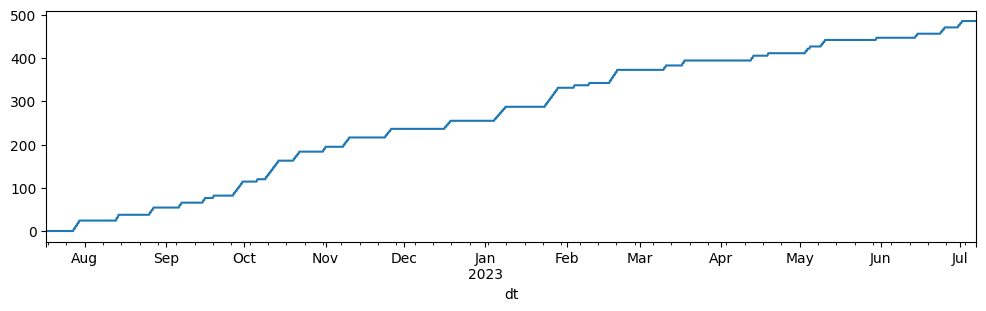

In [691]:
wdf.cum_lrpnl.plot(figsize=(12,3))

In [517]:


# wdf['count_S1'] = wdf['count_S1'].ffill().fillna(0)
trade(wdf)
wdf.to_csv('wdf.csv')
wdf

,S1,S2,lret1,lret2,ratio,rma1,rma2,rstd2,zscore,sig,absZ,zsign,pos,count_S1,count_S1,count_S2,pnl_S1,pnl_S2,pnl
dt,,,,,,,,,,,,,,,,,,,
2022-07-21,0.499341,26.2911,-0.701587,8.343484,0.018993,NaN,NaN,NaN,NaN,0,NaN,0,NaN,0.0,0.0,0.0,NaN,NaN,0.0
2022-07-22,0.482752,24.8968,-0.695141,7.615492,0.019390,NaN,NaN,NaN,NaN,0,NaN,0,NaN,0.0,0.0,0.0,NaN,NaN,0.0
2022-07-23,0.516884,25.5634,-0.709760,7.951936,0.020220,NaN,NaN,NaN,NaN,0,NaN,0,NaN,0.0,0.0,0.0,NaN,NaN,0.0
2022-07-24,0.512030,25.5462,-0.775877,7.881804,0.020043,NaN,NaN,NaN,NaN,0,NaN,0,NaN,0.0,0.0,0.0,NaN,NaN,0.0
2022-07-25,0.475113,23.2592,-0.709789,7.177683,0.020427,0.019815,NaN,NaN,NaN,0,NaN,0,NaN,0.0,0.0,0.0,NaN,NaN,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-07-01,0.292420,20.8846,-0.234229,6.870501,0.014002,0.014722,0.016363,0.001346,-1.218957,1,1.218957,-1,NaN,0.0,0.0,0.0,NaN,NaN,0.0
2023-07-02,0.291700,20.3683,-0.237239,6.702277,0.014321,0.014519,0.016173,0.001353,-1.222463,1,1.222463,-1,NaN,0.0,0.0,0.0,NaN,NaN,0.0
2023-07-03,0.296380,20.0733,-0.240562,6.660065,0.014765,0.014418,0.016009,0.001313,-1.211977,1,1.211977,-1,NaN,0.0,0.0,0.0,NaN,NaN,0.0


In [507]:
# wdf.loc[:,['count_S1','count_S2']] = wdf[['count_S1','count_S2']].ffill().fillna(0).values
# wdf[~wdf.count_S1.isnull()]
# wdf['count_S1'] = wdf['count_S1'].ffill().fillna(0)

# wdf
pos_start_index = '2022-09-03 00:00:00'
start_row = wdf.loc[pos_start_index]
start_row.S1

0.48037

<Axes: xlabel='dt'>

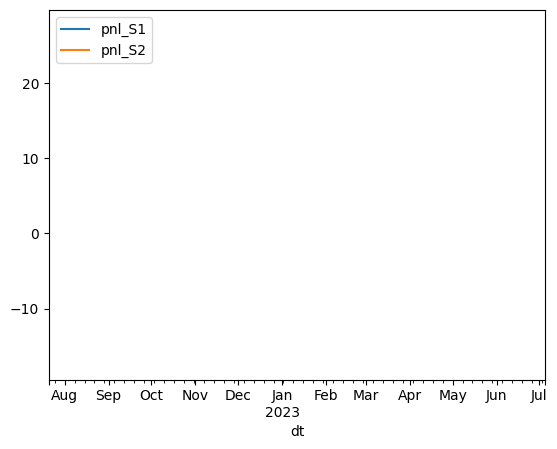

In [541]:
wdf[['pnl_S1','pnl_S2']].cumsum().plot(legend=True)
# wdf[['pnl_S1','pnl_S2']].cumsum().plot()

<Axes: xlabel='dt'>

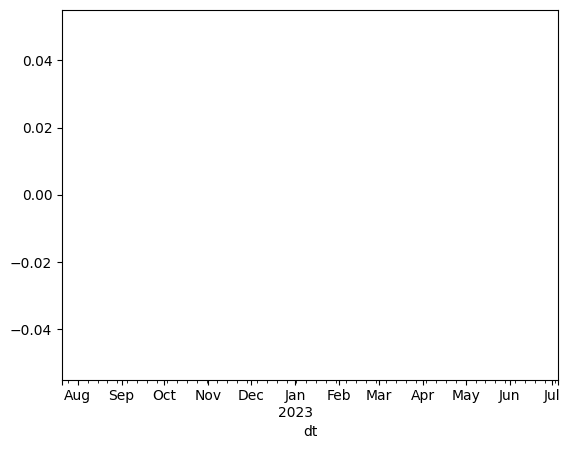

In [513]:
wdf.pnl.plot()

In [540]:
tdf = wdf[~wdf.pnl_S1.isnull()]
tdf.to_csv('trades.csv')
tdf

,S1,S2,lret1,lret2,ratio,rma1,rma2,rstd2,zscore,sig,...,zsign,pos,count_S1,count_S2,pnl_S1,pnl_S2,pnl,cum_pnl,cum_pnl_S1,cum_pnl_S2
dt,,,,,,,,,,,,,,,,,,,,,
2022-09-07,0.478724,37.2387,-0.620730,10.523983,0.012856,0.013857,0.013620,0.000725,0.327442,0,...,1,NaN,0.0,0.0,0.342653,-15.541207,-15.198555,NaN,NaN,NaN
2022-10-03,0.427652,27.4343,-0.492365,8.330196,0.015588,0.015638,0.015171,0.001028,0.453851,0,...,1,NaN,0.0,0.0,2.511905,1.034234,3.546139,NaN,NaN,NaN
2022-10-18,0.362377,23.4069,-0.366879,7.382236,0.015482,0.015795,0.015797,0.000339,-0.005887,0,...,-1,NaN,0.0,0.0,4.938576,1.624813,6.563390,NaN,NaN,NaN
2022-11-07,0.404118,25.0540,-0.443529,7.801288,0.016130,0.016196,0.016054,0.000445,0.318429,0,...,1,NaN,0.0,0.0,-0.721544,-4.237048,-4.958592,NaN,NaN,NaN
2022-11-14,0.332264,20.4703,-0.299687,6.847831,0.016232,0.016543,0.016421,0.000416,0.295170,0,...,1,NaN,0.0,0.0,2.209141,0.149262,2.358403,NaN,NaN,NaN
2022-12-03,0.319582,19.2066,-0.279886,6.428123,0.016639,0.016044,0.016241,0.000516,-0.382970,0,...,-1,NaN,0.0,0.0,1.876014,3.479087,5.355101,NaN,NaN,NaN
2022-12-27,0.260438,15.8534,-0.196275,5.687051,0.016428,0.016067,0.016237,0.000380,-0.446667,0,...,-1,NaN,0.0,0.0,0.379258,3.272177,3.651435,NaN,NaN,NaN
2023-01-11,0.322905,20.5533,-0.285148,6.836571,0.015711,0.015167,0.015471,0.000847,-0.359566,0,...,-1,NaN,0.0,0.0,15.923533,-0.630615,15.292917,NaN,NaN,NaN
2023-02-06,0.382155,22.1242,-0.408399,7.068867,0.017273,0.017275,0.017111,0.000558,0.294428,0,...,1,NaN,0.0,0.0,-6.538593,-4.433818,-10.972412,NaN,NaN,NaN
